In [37]:
import os
import sys

sys.path.append('..')

from src.mutation import Mutation
from src.sequence import Plasmid
from src.eblocks import Eblocks, EblockDesign
from src.primer import DesignPrimers
from src.plot import Plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = 'files/mutations.txt'

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# TODO Format nicely
print("The selected mutations are:")
for mutation in mutation_instance.mutations:
    print(f"\t{mutation.mutation}")

The selected mutations are:
	['G432E']
	['R436Q']
	['I451A']
	['A484S']
	['K562A']
	['I569V']
	['L584V']
	['T595S']
	['D599Y']
	['P618D']
	['N677H']
	['Q722V']
	A770-PLR
	['D773E']
	['K922R']
	['E972G']
	['W973S']
	['Q1023R']
	['A1031T']
	['N1034Q']
	['N1038T']
	['S1046N']
	['L1052E']
	['V1086N']
	['R1090A']
	['N1096E']


In [39]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = 'files/A0QX55.fasta'
vector_file = 'files/vector.dna'

sequence_instance = Plasmid()
sequence_instance.parse_sequence(sequence_file)
sequence_instance.parse_vector(vector_file)

In [40]:
# Create an Eblocks object based on the input mutations and the gene sequence

eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance)

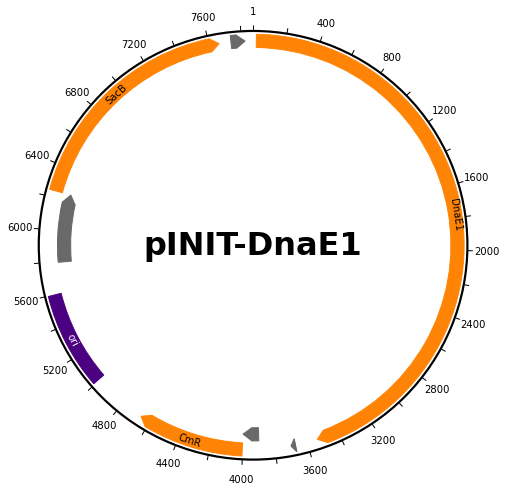

In [47]:
# Create a Plots object and check the input vector

# Set output directory
output_dir = 'output'

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=output_dir)

# Check the input vecto
plot_instance.plot_vector(figsize=(7, 7));

In [48]:
# TODO Descibe the vector here, the gene etc

In [49]:
# Now that we have checked our vector, it is time to run the eBlock design process
design_instance.run_design_eblocks()

Starting eBlock design ...
Optimizing based on price per bp ...
Lowest estimated cost: €714.8
Completed eBlock design.


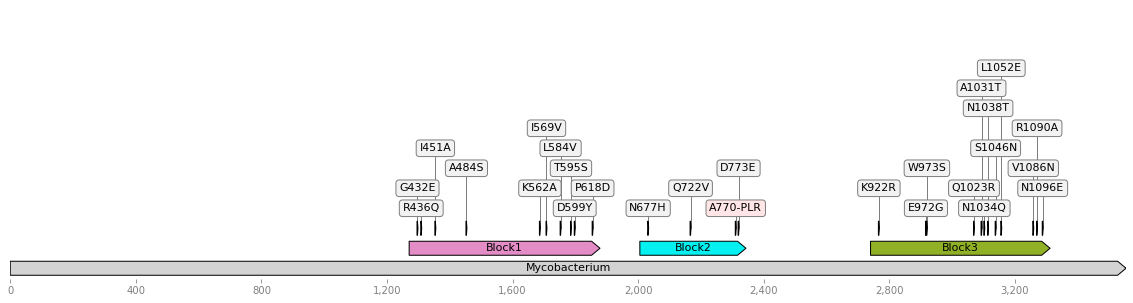

In [50]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [ ]:
# TODO Describe the eblocks here, what you can see with each color etc

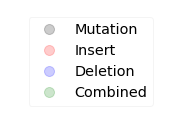

In [52]:
# Each type of mutations (insertions, deletions, substitutions) is represented by a different color, you can see the legend below

plot_instance.plot_mutation_legend()

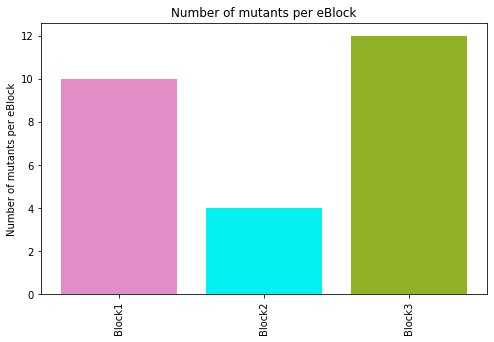

In [53]:
# To see how many mutations can be made in each eBlock, we can plot a histogram

plot_instance.plot_histogram_mutations()

In [ ]:
# TODO Do some explanation here

In [55]:
# TODO Save the eblocks to a file

In [54]:


for k, v in design_instance.eblocks.items():
    print(k, v)
    print(k)

<src.mutation.Mutation object at 0x000002721477FAC8> ['Block_1_pos_1271_1879', 'cgacttcgacgaccggcgccgcgaagagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcagggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagc', 25, 'gaa']
<src.mutation.Mutation object at 0x000002721477FB38> ['Block_1_pos_1271_1879', 'cgacttcgacgaccggcgccgcggtgagatggtgcagtacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgt

In [ ]:
# Now design primers

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblock_instance=eblocks_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance, 
                                 output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

primers_instance.run_IVAprimer()

In [ ]:
for k, v in design_instance.eblocks.items():
    print(k, v)

In [ ]:
sequence_instance.sequence[22:44]

In [ ]:
(str(sequence_instance.sequence)).find('ccgaccacggaaacatgttc')

In [ ]:
(str(sequence_instance.sequence)).find('tcatcatcaccaccggatg')

In [ ]:
236 + 320

In [ ]:
start_index = 0
occurrences = 0
substring = 'tcatcatcaccaccggatg' # 'ccgaccacggaaacatgttc'
while True:
    # Search for the substring starting from start_index
    index = sequence_instance.vector.seq.find(substring, start_index)
    # If the substring is not found, break the loop
    if index == -1:
        break
    # Increment the count of occurrences
    occurrences += 1
    # Move the start_index to search for the next occurrence
    start_index = index + len(substring)
# Check if multiple occurrences were found
if occurrences > 1:
    print("Multiple occurrences found.")
else:
    print("Only one occurrence found.")

In [ ]:
primers_instance.run_SEQprimer()

In [ ]:
for k, v in design_instance.eblocks.items():
    print(k, v[2], v)